In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,amd,intel,radius
0,5571,259,284,0.25
1,4339,205,169,0.26
2,4397,208,430,0.10
3,4088,195,504,0.16
4,1612,99,417,0.17


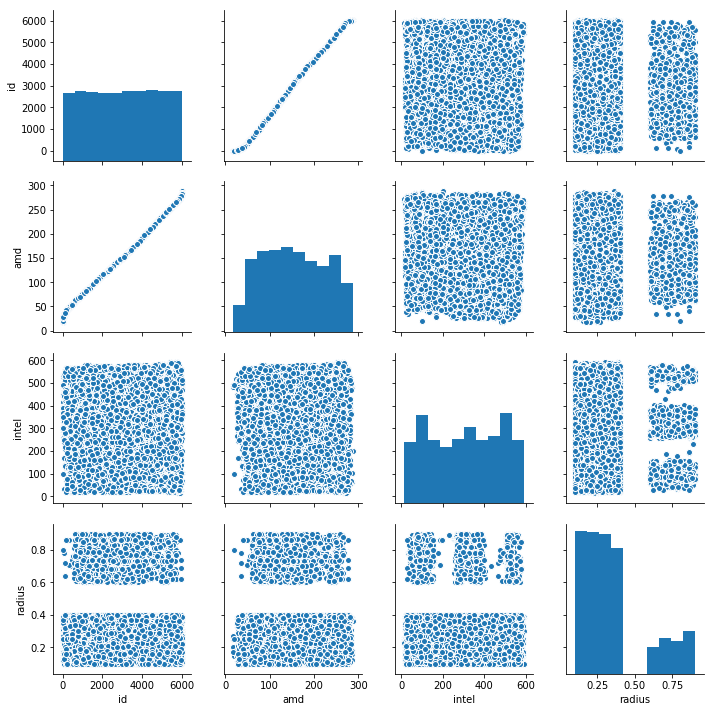

In [4]:
sns.pairplot(df)

In [5]:
plt.scatter(x=np.arange(len(df)), y=df[df.radius==])

SyntaxError: invalid syntax (<ipython-input-5-15607aee9cca>, line 1)

In [6]:
df["sqr_amd"] = df.amd ** 2  
df["sqr_int"] = df.intel ** 2 

In [14]:
df["sqrt_amd"] = df.amd ** 0.5 
df["sqrt_int"] = df.intel ** 0.5

In [22]:
df["sqr_amdby3"] = (df.amd/3) ** 2  
df["sqr_intby3"] = (df.intel/3) ** 2 

In [30]:
df["sqr_amdby2"] = (df.amd/2) ** 2  
df["sqr_intby2"] = (df.intel/2) ** 2 

In [66]:
df["sqr_amdby2by3"] = (df.amd/(2/3)) ** 2  
df["sqr_intby2by3"] = (df.intel/(2/3)) ** 2 

In [75]:
df["sqrt_sqr_prod_amdby2by3"] = (df["sqr_amdby2"]+df["sqr_intby2by3"]) ** 0.5

In [97]:
df["cos_amd"] = np.cos(df.amd/2)
df["sin_int"] = np.sin(df.intel/(2/3))

In [5]:
df["cos_sin_sqrt"] = np.sin(df.amd) * (np.sin(df.amd) + np.cos(df.intel)) ** 0.5

In [6]:
# df["cos_sin_sqrt**2"]

In [7]:
# df['amd']=df['amd']/max(df['amd'])
# df['intel']=df['intel']/max(df['intel'])

In [8]:
df.head()

,id,amd,intel,radius,cos_sin_sqrt
0,5571,259,284,0.25,1.118267
1,4339,205,169,0.26,-0.206701
2,4397,208,430,0.10,NaN
3,4088,195,504,0.16,0.146093
4,1612,99,417,0.17,NaN


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
new_df = df.drop(["id"], axis=1).fillna(0)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(["radius"], axis=1), new_df["radius"], random_state = 101) 

In [12]:
lr = LinearRegression()
lr_train = lr.fit(X_train, y_train)

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [13]:
pred = lr_train.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

In [13]:
print(mean_squared_error(y_test, pred)) # + sqr

0.046208742897641465


In [21]:
print(mean_squared_error(y_test, pred)) # + sqr + sqrt

0.0458078351277752


In [29]:
print(mean_squared_error(y_test, pred)) # + sqr + sqrt + sqr by3

0.045807835127772444


In [37]:
print(mean_squared_error(y_test, pred)) # + sqr + sqrt + sqr by3 + sqr by2

0.04580783512777214


In [46]:
print(mean_squared_error(y_test, pred) ** 0.5) # + sqr + sqrt + sqr by3 + sqr by2

0.21402765038137556


In [176]:
print(mean_squared_error(y_test, pred) ** 0.5) # + sqr + sqrt + sqr by3 + sqr by2

0.22404684528039429


In [15]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
rf = RandomForestRegressor(random_state=101, n_jobs=-1)

In [86]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [87]:
rf_pred = rf.predict(X_test)

In [88]:
print(mean_squared_error(y_test, rf_pred) ** 0.5) # + rf

0.14024846172050187


In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = { 
                "n_estimators": [100, 200, 500, 1000],
                "max_features": np.linspace(0.5, 1, 5),
                "bootstrap": [True, False]
             }

In [59]:
cv_rf = GridSearchCV(param_grid=param_grid, estimator=rf, n_jobs=-1, cv=5, verbose=2)

In [60]:
cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 13.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500, 1000], 'max_features': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]), 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [65]:
cv_rf.best_params_

{'bootstrap': True, 'max_features': 0.875, 'n_estimators': 1000}

In [62]:
cv_rf_pred = cv_rf.predict(X_test)

In [64]:
print(mean_squared_error(y_test, cv_rf_pred) ** 0.5) # + rf

0.13218678847795554


In [16]:
rf_new = RandomForestRegressor(random_state=101, n_estimators=1000, max_features=0.87)

In [17]:
rf_new.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.87, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [18]:
rf_new_pred = rf_new.predict(X_test)

In [19]:
print(mean_squared_error(y_test, rf_new_pred) ** 0.5) # + rf

0.13438285048852683


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
pred_df = pd.DataFrame([X_test.amd, X_test.intel, MinMaxScaler(feature_range=(0,1)).fit_transform(rf_new_pred.reshape(-1,1)).reshape(-1)], columns="amd intel pred".split())

In [22]:
MinMaxScaler(feature_range=(0,1)).fit_transform(rf_new_pred.reshape(-1,1)).reshape(-1)

array([0.33576783, 0.23029858, 0.15891558, ..., 0.06313003, 0.10248499,
       0.06152341])

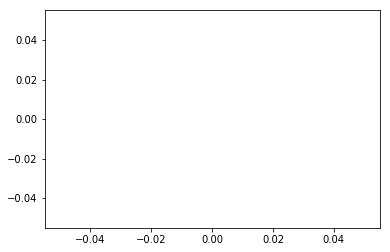

In [23]:
plt.scatter(pred_df[pred_df['pred']>=0.6].amd, pred_df[pred_df['pred']>=0.6].intel)

In [24]:
pred_df["pred"] = rf_new_pred

ValueError: Length of values does not match length of index

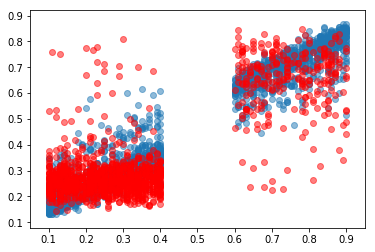

In [24]:
plt.scatter(y_train, rf_new.predict(X_train), alpha=0.5)
plt.scatter(y_test, rf_new_pred, c="red", alpha=0.5)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5422.0,3028.345260,1738.560457,0.000000,1523.250000,3045.500000,4527.750000,6024.000000
amd,5422.0,154.537993,69.836996,18.000000,96.000000,152.000000,214.000000,288.000000
intel,5422.0,306.340280,167.863611,15.000000,154.000000,315.000000,458.000000,591.000000
radius,5422.0,0.350906,0.220059,0.100000,0.190000,0.290000,0.390000,0.900000
cos_sin_sqrt,2670.0,0.425831,0.510626,-0.384328,-0.021567,0.382819,0.836526,1.412483


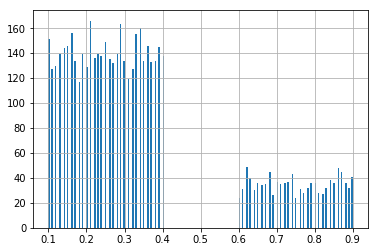

In [26]:
df.radius.hist(bins=200)

In [27]:
from mpl_toolkits.mplot3d import Axes3D

In [28]:
!pip install plotly

tensorflow 1.8.0 has requirement tensorboard<1.9.0,>=1.8.0, but you'll have tensorboard 1.9.0 which is incompatible.


In [29]:
import plotly.plotly as py

# Useful Python/Plotly tools
import plotly.tools as tls

# Graph objects to piece together plots
from plotly.graph_objs import Scatter

In [30]:
test_df = pd.read_csv("test.csv")

In [31]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,603.0,2865.028192,1741.610522,8.0,1398.5,2780.0,4368.0,6022.0
amd,603.0,147.895522,70.007575,23.0,90.0,142.0,206.5,285.0
intel,603.0,315.950249,168.007725,16.0,164.0,326.0,467.5,591.0


In [32]:
test_df.shape

(603, 3)

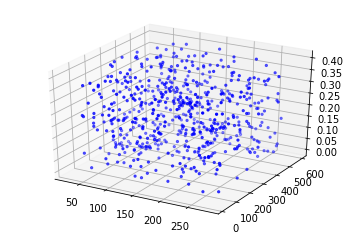

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_df.amd, test_df.intel, np.random.uniform(0, 0.4, 603), c="blue", marker=".")
plt.show()

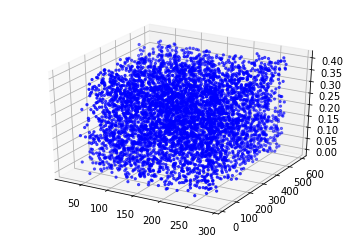

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.amd, df.intel, np.random.uniform(0, 0.4, 5422), c="blue", marker=".")
plt.show()

In [35]:
df["ydl"] = df["radius"].apply(lambda r: r >= 0.6)

In [36]:
df = df[(df.amd!=19) & (df.intel!=99)]

In [37]:
df = df[(df.amd!=34) & (df.intel!=34)]

In [38]:
df = df[(df.amd!=35) & (df.intel!=467)]

In [39]:
df = df[(df.amd!=40) & (df.intel!=289)]

In [40]:
df = df[(df.amd!=48) & (df.intel!=188)]

In [41]:
df = df[(df.amd!=77) & (df.intel!=398)]

In [42]:
df = df[(df.amd!=102) & (df.intel!=485)]

In [43]:
df = df[(df.amd!=120) & (df.intel!=197)]

In [44]:
df = df[(df.amd!=160) & (df.intel!=179)]

In [45]:
df = df[(df.amd!=176) & (df.intel!=477)]

In [46]:
df = df[(df.amd!=232) & (df.intel!=431)]

In [47]:
df = df[(df.amd!=234) & (df.intel!=229)]

In [48]:
df = df[(df.amd!=268) & (df.intel!=264)]

In [49]:
df = df[(df.amd!=278) & (df.intel!=476)]

In [50]:
df = df[(df.amd!=278) & (df.intel!=476)]

In [51]:
df = df[(df.amd!=277) & (df.intel!=27)]

In [52]:
df = df[(df.amd!=278) & (df.intel!=27)]

In [53]:
df = df[(df.amd!=35) & (df.intel!=466)]

In [54]:
df = df[(df.amd!=35) & (df.intel!=465)]

In [55]:
df = df[(df.amd!=52) & (df.intel!=528)]

In [56]:
df = df[(df.amd!=262) & (df.intel!=399)]

In [57]:
df = df[(df.amd!=131) & (df.intel!=553)]

In [58]:
df = df[(df.amd!=134) & (df.intel!=553)]

In [59]:
df = df[(df.amd!=135) & (df.intel!=554)]

In [60]:
df = df[(df.amd!=136) & (df.intel!=555)]

In [61]:
df = df[(df.amd!=139) & (df.intel!=555)]

In [62]:
segmented_df = df[df["ydl"]]

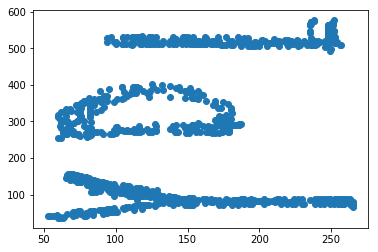

In [63]:
plt.scatter(segmented_df.amd, segmented_df.intel)

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(class_weight="balanced"), param_grid, refit=True, verbose=2)
grid.fit(df[["amd", "intel"]], df[["ydl"]])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.7s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.9s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.9s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.5s


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   14.0s finished
/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
pred = grid.predict(segmented_df[["amd", "intel"]])

In [68]:
from sklearn.metrics import accuracy_score

In [1334]:
accuracy_score(segmented_df[["ydl"]], pred)

0.9715073529411765

In [69]:
accuracy_score(segmented_df[["ydl"]], pred)

0.9989517819706499

In [70]:
print(confusion_matrix(segmented_df[["ydl"]], pred))

[[  0   0]
 [  1 953]]


In [71]:
print(classification_report(segmented_df[["ydl"]], pred))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00         0
       True       1.00      1.00      1.00       954

avg / total       1.00      1.00      1.00       954



/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



In [72]:
df.amd.shape

(4816,)

In [73]:
pred = grid.predict(df[["amd", "intel"]])

In [74]:
pred_df = df.copy()
pred_df["pred"] = pred

In [75]:
pred_df

,id,amd,intel,radius,cos_sin_sqrt,ydl,pred
0,5571,259,284,0.25,1.118267,False,False
1,4339,205,169,0.26,-0.206701,False,False
2,4397,208,430,0.10,NaN,False,False
3,4088,195,504,0.16,0.146093,False,True
4,1612,99,417,0.17,NaN,False,False
5,4559,216,199,0.34,0.329753,False,False
6,3352,163,87,0.77,-0.164504,True,True
7,5732,265,78,0.85,0.170114,True,True
8,2008,114,343,0.36,NaN,False,False
10,5034,236,529,0.68,NaN,True,True


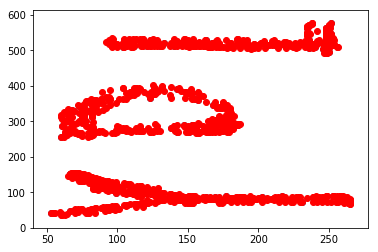

In [76]:
plt.scatter(df[df['ydl']].amd[:100], df[df['ydl']].intel[:100])
plt.scatter(pred_df[pred_df['pred']].amd, pred_df[pred_df['pred']].intel, c='red')

In [77]:
predict_test = grid.predict(test_df[["amd", "intel"]]) 

In [78]:
pred_df_test = test_df.copy()
pred_df_test["pred"] = predict_test

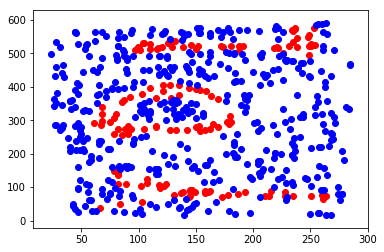

In [79]:
plt.scatter(pred_df_test[pred_df_test['pred']].amd, pred_df_test[pred_df_test['pred']].intel, c='red')
plt.scatter(pred_df_test[~pred_df_test['pred']].amd, pred_df_test[~pred_df_test['pred']].intel, c='blue')

In [80]:
pred_df_test["ydl"] = pred_df_test['pred'].apply(lambda p: 1 if p else 0)

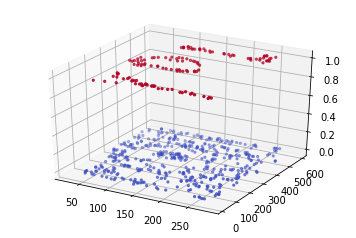

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pred_df_test.amd, pred_df_test.intel, pred_df_test.ydl, c=pred_df_test.ydl, cmap="coolwarm", marker=".")
plt.show()

In [122]:
sum(pred_df_test["ydl"])

139

In [123]:
603-139

464

In [110]:
pred_df_test.shape

(603, 5)

In [82]:
pred_df_test["radius"] = pred_df_test["pred"].apply(lambda p: np.random.uniform(0.73, 0.87) if p else np.random.uniform(0.13, 0.27))


In [83]:
pred_df_test

,id,amd,intel,pred,ydl,radius
0,4365,206,405,False,0,0.170233
1,1129,80,320,True,1,0.742776
2,2602,136,228,False,0,0.132742
3,1747,105,531,True,1,0.745586
4,3286,161,475,False,0,0.219678
5,787,68,80,False,0,0.221643
6,2834,144,412,False,0,0.259770
7,84,33,345,False,0,0.160385
8,2995,150,350,False,0,0.164520
9,1557,97,310,False,0,0.237135


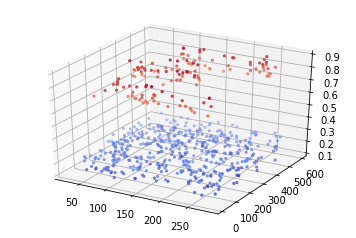

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pred_df_test.amd, pred_df_test.intel, pred_df_test.radius, c=pred_df_test.radius, cmap="coolwarm", marker=".")
plt.show()

In [85]:
pred_df_test_to_save = pred_df_test.copy()
pred_df_test_to_save.drop(["pred", "ydl", "amd", "intel"], axis=1, inplace=True)

In [86]:
pred_df_test.to_csv("preprocessed_test.csv", index=False)

In [87]:
pred_df["radius_pred"] = pred_df["pred"].apply(lambda p: np.random.uniform(0.73, 0.87) if p else np.random.uniform(0.13, 0.27))

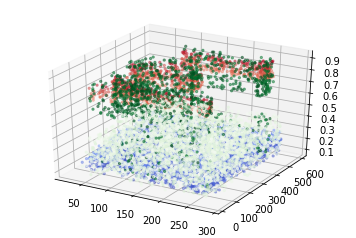

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pred_df.amd, pred_df.intel, pred_df.radius_pred, c=pred_df.radius_pred, cmap="coolwarm", marker=".", alpha=0.4)
ax.scatter(pred_df.amd, pred_df.intel, pred_df.radius, c=pred_df.radius_pred, cmap="Greens", marker=".", alpha=0.5)
plt.show()

In [89]:
mean_squared_error(pred_df.radius_pred, pred_df.radius) ** 0.5

0.15499003175024936

In [90]:
pred_df.to_csv("preprocessed.csv")